# Import Library

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('../dataset/survey.csv', delimiter=(';'))
df

,Survey,Label
0,Sangat baik dalam menjelaskan materi dan juga ...,positif
1,walaupun yang mengajar selalu asisten tetapi m...,positif
2,"Walaupun, Pelajaran ini merupakan kelas besar ...",negatif
3,sebaiknya tidak usah menyuruh maju satu persat...,negatif
4,"semoga lebih baik kedepannya,",positif
...,...,...
2874,"sudah sangat baik, sabar dan telaten dalam men...",positif
2875,sarannya lebih baik dijelaskan secara langsung...,negatif
2876,cara untuk mengajarnya lebih di tingkatkan kem...,positif
2877,"sangat bagus mendatangkan para narasumber hebat,",positif


# EDA

In [78]:
df.shape

(2879, 2)

In [79]:
df.columns

Index(['Survey', 'Label'], dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Survey  2879 non-null   object
 1   Label   2879 non-null   object
dtypes: object(2)
memory usage: 45.1+ KB


In [81]:
df['Label'].value_counts()

Label
positif    1792
negatif    1087
Name: count, dtype: int64

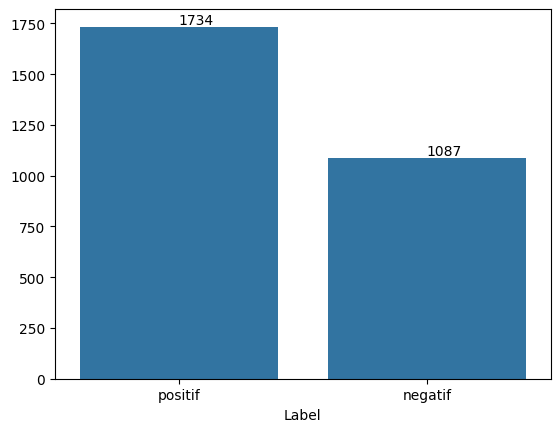

In [117]:
sns.barplot(
    x = df['Label'].value_counts().index,
    y = df['Label'].value_counts().values
)
for i in range(len(df['Label'].value_counts().index)):
    plt.text(i, df['Label'].value_counts().values[i], df['Label'].value_counts().values[i], va = "bottom" )

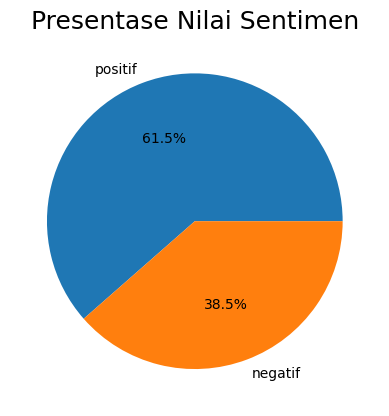

In [118]:
plt.pie(
    df['Label'].value_counts(),
    autopct= "%1.1f%%",
    labels= df['Label'].value_counts().index
)
plt.title("Presentase Nilai Sentimen", fontsize = 18)
plt.show()

In [83]:
df.duplicated().sum()

np.int64(58)

In [84]:
df.isnull().sum()

Survey    0
Label     0
dtype: int64

In [85]:
print(' '.join(df['Survey']))

Sangat baik dalam menjelaskan materi dan juga menyampikan tugas tugas, walaupun yang mengajar selalu asisten tetapi materi yang disampaikan sangat baik., Walaupun, Pelajaran ini merupakan kelas besar sebaiknya bisa diadakan offline dan online secara bergantian., sebaiknya tidak usah menyuruh maju satu persatu untuk mengerjakan soal cukup menyuruh anak yang mampu saja,karena ketika maju saat dipanggil saat tidak bisa memang diajarin caranya tapi terkesan memarahi.Saya kira saya sedang berada di sekolah bukan Pelajaran., semoga lebih baik kedepannya, Pelajaran dilaksanakan secara offline, Bismillah lancar, mungkin untuk guru pengampu pada mapel mtk semester ini untuk cara mengajarnya lebih disemangatkan lagi, dan sekiranya tidak ada halangan bisa on cam agar Siswa tidak boring padamapel tersebut, Saran untuk pembelajaran Pelajaran elektronika telekomunikasi adalah semoga semakin lebih baik lagi dalam menyampaikan materi, Gurunya asik, Saran bu, mungkin kedepannya jika menjelaskan materi 

# Preprocessing

In [86]:
## drop duplicated
df = df.drop_duplicates()

In [87]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [88]:
import re

def cleaning(komen):
    komen = komen.lower()
    komen = re.sub(r'[^a-zA-Z\s]', '', komen)
    komen = re.sub(r'(.)\1{2,}', r'\1', komen)
    komen = re.sub(r'\b\w\b', '', komen)
    komen = re.sub(r'\s+', ' ', komen)
    return komen

df['Survey'] = df['Survey'].apply(cleaning)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\3952324161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(cleaning)


,Survey,Label
0,sangat baik dalam menjelaskan materi dan juga ...,positif
1,walaupun yang mengajar selalu asisten tetapi m...,positif
2,walaupun pelajaran ini merupakan kelas besar s...,negatif
3,sebaiknya tidak usah menyuruh maju satu persat...,negatif
4,semoga lebih baik kedepannya,positif
...,...,...
2874,sudah sangat baik sabar dan telaten dalam meng...,positif
2875,sarannya lebih baik dijelaskan secara langsung...,negatif
2876,cara untuk mengajarnya lebih di tingkatkan kem...,positif
2877,sangat bagus mendatangkan para narasumber hebat,positif


In [89]:
print(' '.join(df['Survey']))

sangat baik dalam menjelaskan materi dan juga menyampikan tugas tugas walaupun yang mengajar selalu asisten tetapi materi yang disampaikan sangat baik walaupun pelajaran ini merupakan kelas besar sebaiknya bisa diadakan offline dan online secara bergantian sebaiknya tidak usah menyuruh maju satu persatu untuk mengerjakan soal cukup menyuruh anak yang mampu sajakarena ketika maju saat dipanggil saat tidak bisa memang diajarin caranya tapi terkesan memarahisaya kira saya sedang berada di sekolah bukan pelajaran semoga lebih baik kedepannya pelajaran dilaksanakan secara offline bismillah lancar mungkin untuk guru pengampu pada mapel mtk semester ini untuk cara mengajarnya lebih disemangatkan lagi dan sekiranya tidak ada halangan bisa on cam agar siswa tidak boring padamapel tersebut saran untuk pembelajaran pelajaran elektronika telekomunikasi adalah semoga semakin lebih baik lagi dalam menyampaikan materi gurunya asik saran bu mungkin kedepannya jika menjelaskan materi bisa improf dan di

## Tokenize

In [90]:
from nltk.tokenize import word_tokenize
def tokenize(komen):
    return word_tokenize(komen)

df['Survey'] = df['Survey'].apply(tokenize)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\692889726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(tokenize)


,Survey,Label
0,"[sangat, baik, dalam, menjelaskan, materi, dan...",positif
1,"[walaupun, yang, mengajar, selalu, asisten, te...",positif
2,"[walaupun, pelajaran, ini, merupakan, kelas, b...",negatif
3,"[sebaiknya, tidak, usah, menyuruh, maju, satu,...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sudah, sangat, baik, sabar, dan, telaten, dal...",positif
2875,"[sarannya, lebih, baik, dijelaskan, secara, la...",negatif
2876,"[cara, untuk, mengajarnya, lebih, di, tingkatk...",positif
2877,"[sangat, bagus, mendatangkan, para, narasumber...",positif


## Stopword remove

In [91]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()

def filtering(komen):
    komen = [word for word in komen if word not in stopword]
    return komen

df['Survey'] = df['Survey'].apply(filtering)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\3812792588.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(filtering)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, mengajar, selalu, asisten, materi, ...",positif
2,"[walaupun, pelajaran, merupakan, kelas, besar,...",negatif
3,"[sebaiknya, usah, menyuruh, maju, satu, persat...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, telaten, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


## Normalisasi

In [92]:
# mengambil kata pada dataset
def ambil(df, kolom):
    frekuensi = {}
    for row in df[kolom]:
        for token in row:
            if token in frekuensi:
                frekuensi[token] += 1
            else:
                frekuensi[token] = 1
    kata = {token : frekuensi[token] for token in frekuensi if frekuensi[token] > 1}
    return kata

list_kata = ambil(df, 'Survey')
print(len(list_kata))
print(list_kata)

1266
{'sangat': 400, 'baik': 889, 'menjelaskan': 127, 'materi': 755, 'menyampikan': 2, 'tugas': 164, 'walaupun': 11, 'mengajar': 231, 'selalu': 131, 'asisten': 19, 'disampaikan': 71, 'pelajaran': 185, 'merupakan': 2, 'kelas': 189, 'besar': 15, 'sebaiknya': 50, 'diadakan': 29, 'offline': 118, 'online': 42, 'menyuruh': 2, 'maju': 6, 'satu': 67, 'persatu': 10, 'mengerjakan': 17, 'soal': 53, 'cukup': 161, 'anak': 15, 'mampu': 17, 'memang': 15, 'diajarin': 2, 'caranya': 2, 'terkesan': 4, 'kira': 4, 'sedang': 7, 'berada': 4, 'sekolah': 21, 'bukan': 22, 'semoga': 398, 'lebih': 792, 'kedepannya': 201, 'dilaksanakan': 12, 'lancar': 16, 'mungkin': 187, 'guru': 334, 'pengampu': 26, 'mapel': 51, 'mtk': 3, 'semester': 101, 'cara': 120, 'mengajarnya': 63, 'sekiranya': 9, 'on': 4, 'cam': 2, 'siswa': 402, 'boring': 2, 'tersebut': 19, 'saran': 264, 'pembelajaran': 198, 'telekomunikasi': 2, 'semakin': 39, 'menyampaikan': 106, 'gurunya': 25, 'asik': 23, 'bu': 334, 'dijelaskan': 16, 'menggunakan': 22, 'ib

In [93]:
# pembenaran kata
kamus = {'kata':[], 'pembenaran':[]}

for i, token in enumerate(list_kata):
    jawaban = input(f'{i} masukkan pembenaran untuk kata {token}:')
    if jawaban != '':
        kamus['kata'].append(token)
        kamus['pembenaran'].append(jawaban)
    if jawaban == 'stop':
        break

0 masukkan pembenaran untuk kata sangat: sangat
1 masukkan pembenaran untuk kata baik: baik
2 masukkan pembenaran untuk kata menjelaskan: 
3 masukkan pembenaran untuk kata materi: 
4 masukkan pembenaran untuk kata menyampikan: 
5 masukkan pembenaran untuk kata tugas: 
6 masukkan pembenaran untuk kata walaupun: 
7 masukkan pembenaran untuk kata mengajar: 
8 masukkan pembenaran untuk kata selalu: 
9 masukkan pembenaran untuk kata asisten: 
10 masukkan pembenaran untuk kata disampaikan: 
11 masukkan pembenaran untuk kata pelajaran: 
12 masukkan pembenaran untuk kata merupakan: 
13 masukkan pembenaran untuk kata kelas: 
14 masukkan pembenaran untuk kata besar: 
15 masukkan pembenaran untuk kata sebaiknya: 
16 masukkan pembenaran untuk kata diadakan: 
17 masukkan pembenaran untuk kata offline: 
18 masukkan pembenaran untuk kata online: 
19 masukkan pembenaran untuk kata menyuruh: 
20 masukkan pembenaran untuk kata maju: 
21 masukkan pembenaran untuk kata satu: 
22 masukkan pembenaran untuk 

In [96]:
# mengubah format ke dict
kamus_kata = dict(zip(kamus['kata'], kamus['pembenaran']))

In [99]:
# import joblib
# joblib.dump(kamus_kata, 'kamus23223.txt')

['kamus23223.txt']

In [106]:
# menambahkan kata yang terlewat
terlewat = {
    'kerasin':'keraskan',
    'makasih':'terimakasih',
    'liat':'lihat',
    'kuiz':'kuis',
    'keren':'bagus',
    'mantab':'bagus',
    'mantap':'bagus',
    'dikasih':'diberi',
    'ketemu':'bertemu',
    'cuman':'hanya',
    'cuman':'hanya',
}

# kamus_kata = kamus_kata.update{terlewat}

In [107]:
# menerapkan ke dataset
def normalisasi(komen):
    komen = [kamus_kata.get(word, word) for word in komen]
    return komen

df['Survey'] = df['Survey'].apply(normalisasi)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\1920141250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(normalisasi)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, mengajar, selalu, asisten, materi, ...",positif
2,"[walaupun, pelajaran, merupakan, kelas, besar,...",negatif
3,"[sebaiknya, usah, menyuruh, maju, satu, persat...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, teliti, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


In [110]:
# menghapus stopword yang baru saja terdeteksi
df['Survey'] = df['Survey'].apply(filtering)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\3736722023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(filtering)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, mengajar, selalu, asisten, materi, ...",positif
2,"[walaupun, pelajaran, merupakan, kelas, besar,...",negatif
3,"[sebaiknya, usah, menyuruh, maju, satu, persat...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, teliti, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


## Stemming

In [111]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(komen):
    komen = [stemmer.stem(word) for word in komen]
    komen = ' '.join(komen)
    return komen

df['Survey'] = df['Survey'].apply(stemming)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_34544\2684097632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(stemming)


,Survey,Label
0,sangat baik jelas materi menyampikan tugas tugas,positif
1,walaupun ajar selalu asisten materi sampai san...,positif
2,walaupun ajar rupa kelas besar baik ada offlin...,negatif
3,baik usah suruh maju satu satu kerja soal cuku...,negatif
4,moga lebih baik depan,positif
...,...,...
2874,sangat baik sabar teliti ajar alpro,positif
2875,saran lebih baik jelas langsung jangan lewat m...,negatif
2876,cara ajar lebih tingkat,positif
2877,sangat bagus datang narasumber hebat,positif


# Tf-IDF

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,2))
X = vec.fit_transform(df['Survey'])
y = df['Label']

# Imbalance Data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# opsional

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)